In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def recommend(data, user):
    # First, we determine which artists we can recommend, i.e., the ones we haven't listened to yet
    artists = [a for a in data.columns if pd.isna(data.loc[user][a])]
    # We calculate the correlation of our user with all other users
    user_corr = data.T.corr()[user]
    # We calculate the artists we might like the most using a loop
    recommended = {}  # We create an empty dictionary to store the results
    for a in artists:  # Iterate through the artists to recommend
        matrix = pd.concat([user_corr, data[a]], axis=1)  # For each artist we haven't listened to,
        # we create a matrix with the Pearson correlation coefficients and each user's ratings.
        # We remove users who haven't listened to the artist, including our user
        matrix.dropna(axis=0, inplace=True, how='any')
        # We calculate the weighted scores, meaning the ratings considering the similarity between users.
        matrix['WS'] = matrix[user] * matrix[a]
        # We calculate the sum of the weighted scores.
        sum_pond = matrix['WS'].sum()
        # We calculate the sum of the correlations.
        sum_corr = matrix[user].sum()
        # We calculate and store the result in the dictionary.
        recommended[a] = sum_pond / sum_corr
    recommended = pd.Series(recommended, index=recommended.keys()).sort_values(ascending=False)
    # Return a sorted column with all the scores.
    return recommended


In [ ]:
music = pd.read_csv("Dataset.csv", delimiter=";", decimal=",", index_col='User')
music

,Playboi Carti,Yung Beef,Freefall Collective,Jorja Smith,Soto Asa,Colombo,Dj Karpin,La Zowi
Usuario,,,,,,,,
Elena,2.0,4.5,NaN,5.0,4.0,3.0,2.5,5.0
Lola,1.0,4.0,3.5,4.0,5.0,2.0,1.5,4.5
Emma,NaN,3.5,4.5,5.0,4.0,3.5,3.0,5.0
Alejandro,4.5,4.0,2.0,3.0,2.0,3.0,4.0,4.5
Miguel,5.0,4.0,NaN,1.5,3.5,3.0,1.5,1.0
Nicolas,2.0,4.5,4.0,4.0,1.0,2.0,1.0,1.5
Raul,4.5,NaN,NaN,NaN,5.0,NaN,5.0,3.0
Marcos,NaN,2.5,4.0,NaN,2.5,5.0,4.5,1.5
Alvaro,1.5,4.5,NaN,4.0,3.5,4.5,3.5,4.0


In [ ]:
try:
    user = input('Enter the name of the user you want to recommend: ')
    recommended = recommend(music, user)
    print('User registered.')
    print(recommended)
except:
    print('User not registered. Try another user.')

Escriba el nombre del usuario al que desea recomendar: Raul
Usuario registrado.
Jorja Smith            4.436647
Yung Beef              4.435435
Freefall Collective    3.002038
Colombo                2.148862
dtype: float64


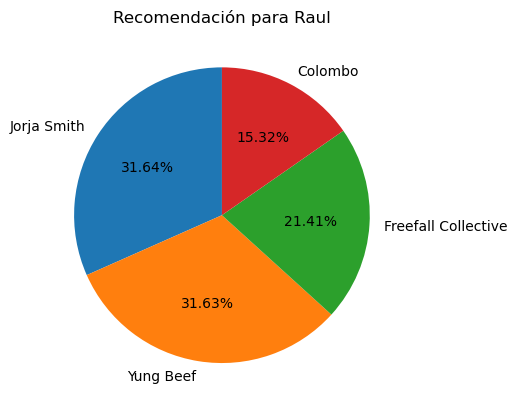

In [ ]:
# Para visualizar las recomendaciones representamos una gráfica circular
recommended.plot(kind="pie",title="Recommendation for "+user,autopct = "%0.2f%%",startangle = 90)
plt.ylabel('')
plt.show()